In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
x_offsets = np.sort(
        # np.concatenate(([-week_size + 1, -day_size + 1], np.arange(-11, 1, 1)))
        np.concatenate((np.arange(-11, 1, 1),))
    )

In [3]:
x_offsets

array([-11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0])

In [4]:
abs(min(x_offsets))

11

In [13]:
train = np.load("../data/traffic/trafficWithTime/train.npz")

In [14]:
train["x"].shape

(23974, 12, 207, 9)

In [63]:
transX = train["x"].transpose(1,0,3,2)

In [64]:
transX.shape

(12, 23974, 9, 207)

In [65]:
transY = train["y"][:,:,:,0].transpose(1,0,2)

In [66]:
transY.shape

(12, 23974, 207)

In [15]:
train["x"][0,0,0,:]

array([64.375,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,
        0.   ])

In [18]:
df = pd.read_hdf("/users/danielzeiberg/Documents/TrafficData/df_highway_2012_4mon_sample.h5")

In [20]:
num_samples, num_nodes = df.shape
time_ind = (df.index.values - df.index.values.astype("datetime64[D]")) / np.timedelta64(1, "D")
time_in_day = np.tile(time_ind, [1, num_nodes, 1]).transpose((2, 1, 0))

In [22]:
time_in_day.shape

(34272, 207, 1)

In [30]:
time_in_day[:3600,0,0]

array([0.        , 0.00347222, 0.00694444, ..., 0.48958333, 0.49305556,
       0.49652778])

In [23]:
day_in_week = np.zeros(shape=(num_samples, num_nodes, 7))
day_in_week[np.arange(num_samples), :, df.index.dayofweek] = 1

In [24]:
day_in_week.shape

(34272, 207, 7)

In [31]:
time_ind

array([0.        , 0.00347222, 0.00694444, ..., 0.98958333, 0.99305556,
       0.99652778])

In [39]:
df.index.values[:10]

array(['2012-03-01T00:00:00.000000000', '2012-03-01T00:05:00.000000000',
       '2012-03-01T00:10:00.000000000', '2012-03-01T00:15:00.000000000',
       '2012-03-01T00:20:00.000000000', '2012-03-01T00:25:00.000000000',
       '2012-03-01T00:30:00.000000000', '2012-03-01T00:35:00.000000000',
       '2012-03-01T00:40:00.000000000', '2012-03-01T00:45:00.000000000'],
      dtype='datetime64[ns]')

In [40]:
df.index.values.astype("datetime64[D]")[:10]

array(['2012-03-01', '2012-03-01', '2012-03-01', '2012-03-01',
       '2012-03-01', '2012-03-01', '2012-03-01', '2012-03-01',
       '2012-03-01', '2012-03-01'], dtype='datetime64[D]')

In [41]:
(df.index.values - df.index.values.astype("datetime64[D]"))[:10]

array([            0,  300000000000,  600000000000,  900000000000,
       1200000000000, 1500000000000, 1800000000000, 2100000000000,
       2400000000000, 2700000000000], dtype='timedelta64[ns]')

In [42]:
df.index.values[1]

numpy.datetime64('2012-03-01T00:05:00.000000000')

In [43]:
df.index.values[1].astype("datetime64[D]")

numpy.datetime64('2012-03-01')

In [45]:
df.index.values[1] - df.index.values[1].astype("datetime64[D]") # 5 minutes

numpy.timedelta64(300000000000,'ns')

In [46]:
(df.index.values[1] - df.index.values[1].astype("datetime64[D]")) / np.timedelta64(1, "D")

0.003472222222222222

In [36]:
df.index.values.astype("datetime64[D]") / np.timedelta64(1, "D")

TypeError: ufunc true_divide cannot use operands with types dtype('<M8[D]') and dtype('<m8[D]')

Text(0,0.5,'fraction of day')

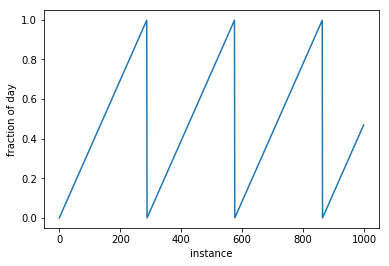

In [52]:
plt.plot(time_in_day[:1000,0,0])
plt.xlabel("instance")
plt.ylabel("fraction of day")

In [54]:
x = train["x"]
y = train["y"]

In [58]:
stk = np.concatenate((x,y), axis=0)

In [59]:
stk.shape

(47948, 12, 207, 9)

In [67]:
import torch

In [45]:
input = torch.tensor((), dtype=torch.int32)
input = input.new_ones((2, 3))
print(input)
d= input.clone().detach().numpy()
d[1,1] = 55
print(d)
print(input)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)
[[ 1  1  1]
 [ 1 55  1]]
tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)


In [33]:
d= input.detach().numpy()
d

array([[ 0.0000000e+00, -1.0842022e-19,  3.9490368e-03],
       [ 1.0844662e-19,  3.9367685e-03, -1.0844662e-19]], dtype=float32)

In [34]:
d[1,1] = 55

In [35]:
d

array([[ 0.0000000e+00, -1.0842022e-19,  3.9490368e-03],
       [ 1.0844662e-19,  5.5000000e+01, -1.0844662e-19]], dtype=float32)

In [36]:
input

tensor([[ 0.0000, -0.0000,  0.0039],
        [ 0.0000, 55.0000, -0.0000]])

In [49]:
type(input[1,1].item())

int

In [2]:
t = torch.FloatTensor([1,2,3])


In [4]:
torch.norm(t, 2).pow(2)

tensor(14.0000)